# Merkmalsanalyse
Um eine Basis der Darstellung der Merkmale für unser Modell zu haben, schaffen wir uns einen Einblick wie denn diese Merkmale ausgeprägt sind.

In [8]:
import pandas as pd
from src.data import load_full_data

data_df = load_full_data()
data_df.head(5)

,index,scene_id,duration,rating,sessionID,ageGroup,bicycleUse,district,gender,hasChildren,...,RVA-Lage,RVA-Oberfläche,Tr_li-Markierung,Tr_li-baulTrennung,Tr_re-Markierung,Parken,besondere Merkmale,FS-Breite,Verkehrsaufkommen,Nutzfläche
0,1,01_CP_C_1226,2835.0,3.0,6bbf3fed-46ab-4221-930b-4ac3fa0acff8,4.0,0.0,Neukölln,m,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,189,01_CP_C_1226,3701.0,3.0,dc6c5279-3294-4d41-bdef-00b7bdf4ae3d,5.0,1.0,Treptow-Köpenick,m,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,8,01_CP_C_1226,3381.0,3.0,18b5b5dd-9369-4dcd-beae-34efe63d44ad,1.0,1.0,Charlottenburg-Wilmersdorf,m,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,7,01_CP_C_1226,1784.0,3.0,05a41c9d-ecd5-48ea-a1b3-71598f8e066f,3.0,1.0,Charlottenburg-Wilmersdorf,w,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,11,01_CP_C_1226,6312.0,2.0,b398c275-6ffe-491a-b087-3d95982e494f,4.0,-1.0,Tempelhof-Schöneberg,m,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


Da die meisten Merkmale Kategorische Variablen aus dem Experiment darstellen, müssen wir uns viele nicht anschauen. Bei diesen Variablen, sollten wir uns deshalb vor allem all jene anschauen, die wir anders darstellen können. In diese Kategorie fallen die verschiedenen Breiten.

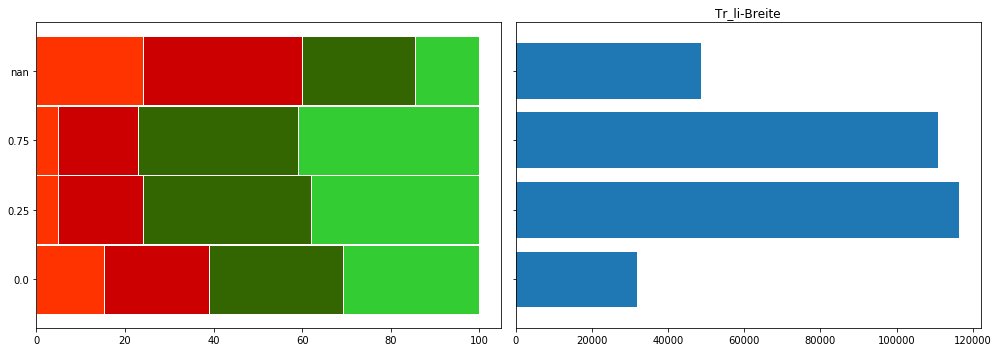

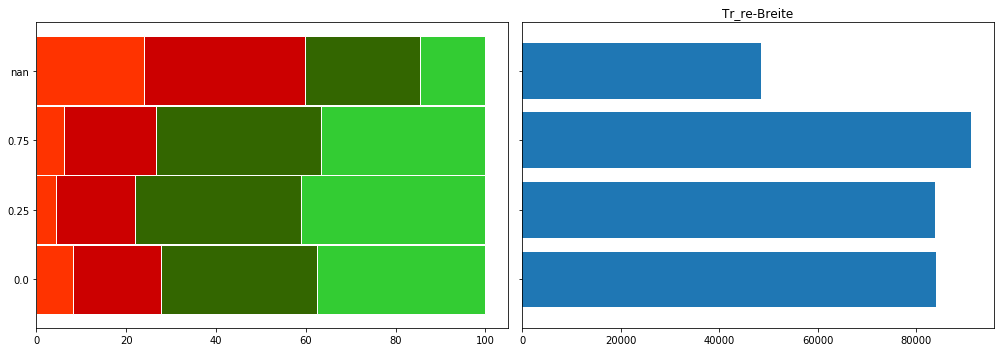

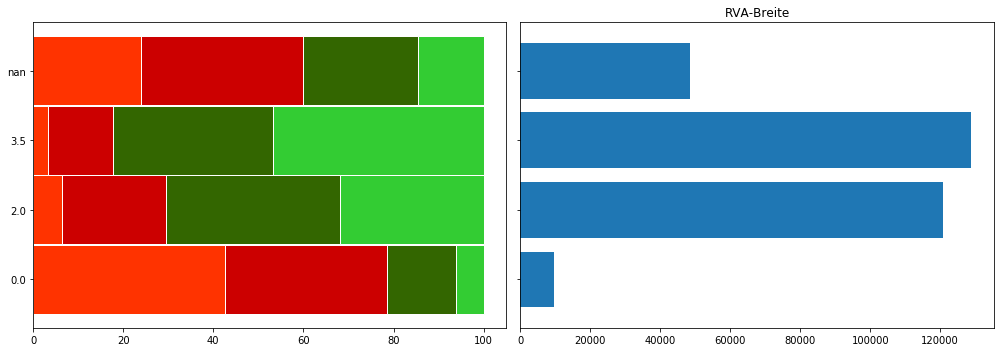

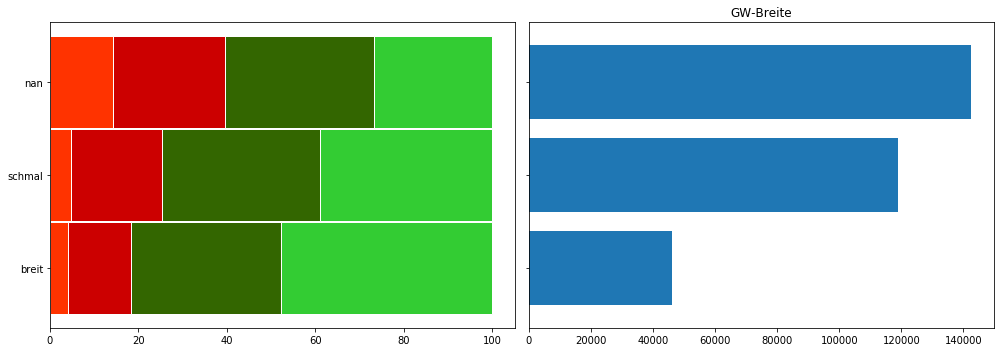

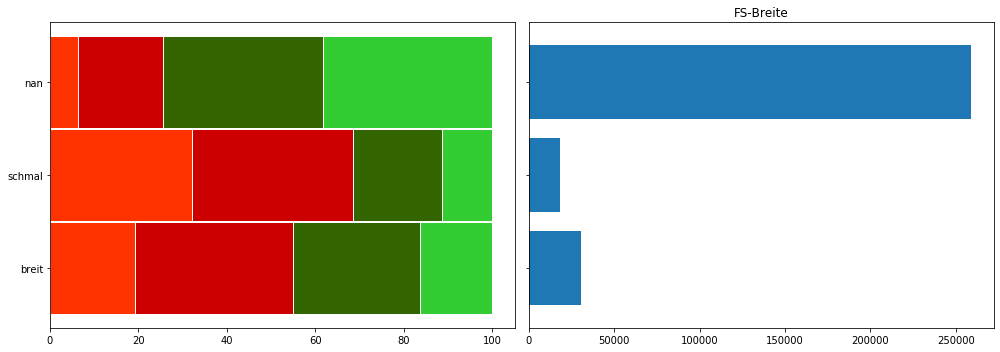

In [9]:
from src.visualization.visualize import likert_plot
import matplotlib.pyplot as plt

width_features = ["Tr_li-Breite", "Tr_re-Breite", "RVA-Breite", "GW-Breite", "FS-Breite"]
likert_plot(data_df[[*width_features, "rating"]])

Wie man an den Plots oben erkennen kann, gilt grundsätzlich ein linear positiver Zusammenhang zwischen der Breite Merkmale und der subjektiven Sicherheit. Die einzige Ausnahme bildet hier das Merkmal *Tr_re-Breite*. Es lohnt sich deshalb, *Tr_re-Breite* als eine kategorische Variable zu betrachten.

Bei den einzelnen Eingaben gibt es zudem die Reihenfolge der Eingaben *index* für jeden Teilnehmer. Hier wäre ein Blick auf einen möglichen Lerneffekt interessant. Da einige einzelne Teilnehmer sehr viele Eingaben getätigt haben, reduzieren wir die visualisierung auf die ersten 20 Eingaben.

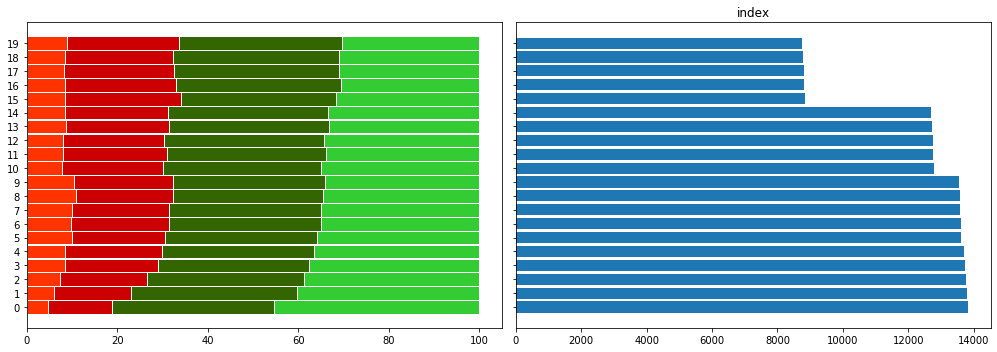

In [10]:
df = data_df.copy()
df = df[df["index"] < 20]
likert_plot(df[["index", "rating"]])

Hier erkennt man einen Lerneffekt für die ersten 10 Eingaben. Nun schauen wir uns einmal die Eingaben zwischen *index* 20-40 an.

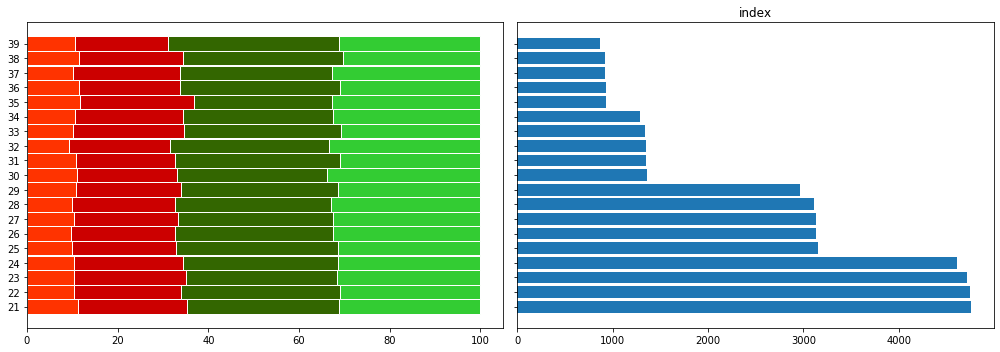

In [11]:
df = data_df.copy()
df = df[df["index"] > 20]
df = df[df["index"] < 40]
likert_plot(df[["index", "rating"]])

Da sich die Eingaben nun nicht mehr verändern, macht es Sinn den *index* auf 11 zu begrenzen. Alle späteren Eingaben werden dann unter *index* 11 zusammengefasst.

Zu guter Letzt ist noch die Betrachtung von der Antwortzeit der Eingabe interessant.

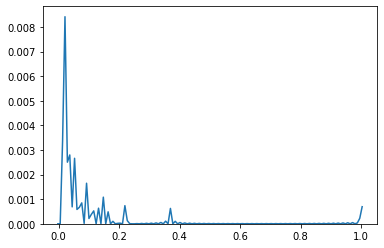

In [12]:
from sklearn.preprocessing import scale, minmax_scale
import seaborn as sns

duration_data = data_df["duration"]
duration_data = minmax_scale(duration_data)
sns.kdeplot(duration_data, bw=0.001, kernel="gau")

Hier konzentrieren sich der Großteil der Eingaben an den Anfang der Zeitmessung. Um diese genauer zu betrachten, trennen wir diese von der Gesamtmenge.

          duration    rating
duration  1.000000 -0.062558
rating   -0.062558  1.000000


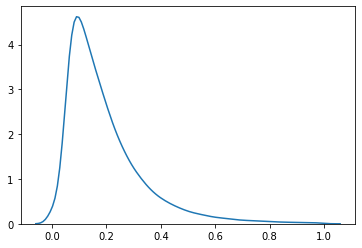

In [13]:
cutoff = 25800

df = data_df[["duration", "rating"]]
df = df[df["duration"] < cutoff]
duration_data = minmax_scale(df["duration"])
sns.kdeplot(duration_data, bw=0.02, kernel="gau")
print(df.corr())

In dieser Menge, scheint es keinen signifikanten Zusammenhang zwischen der Eingabe und unserer Zielvariablen zu geben. Nun schauen wir uns die restlichen Eingaben an.

          duration    rating
duration  1.000000 -0.000034
rating   -0.000034  1.000000


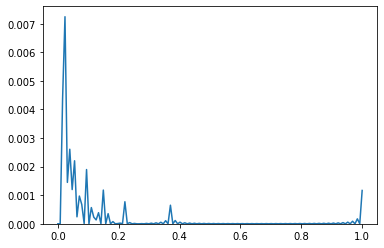

In [14]:
cutoff = 25800

df = data_df[["duration", "rating"]]
df[df["duration"] > cutoff]
duration_data = minmax_scale(df["duration"])
sns.kdeplot(duration_data, bw=0.0001, kernel="gau")
print(df.corr())

Hier ist der Zusammenhang sogar noch kleiner. *duration* ist somit ein Kandidat für den Ausschluss aus dem Modelltraining.